<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

## Import the necessary software libraries:

## Initialize the environment

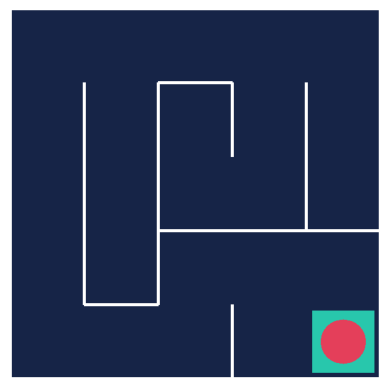

Observation space shape:[5 5]
Number of actions:4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

#### Test the policy with state (0, 0)

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

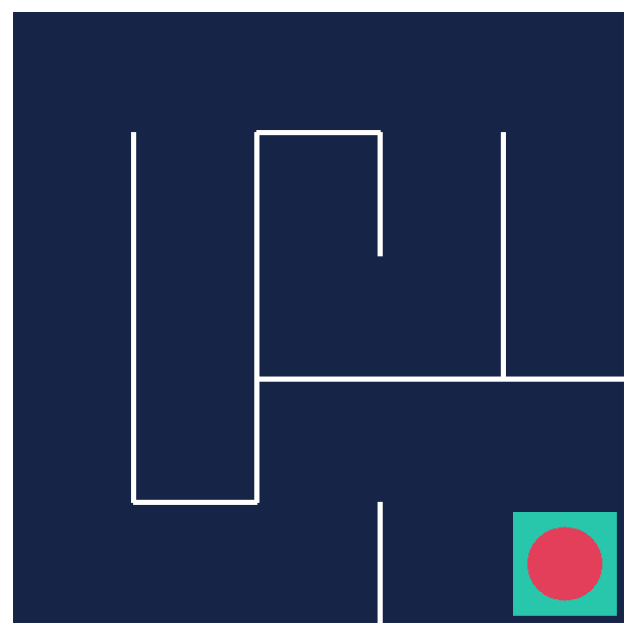

#### Plot the policy

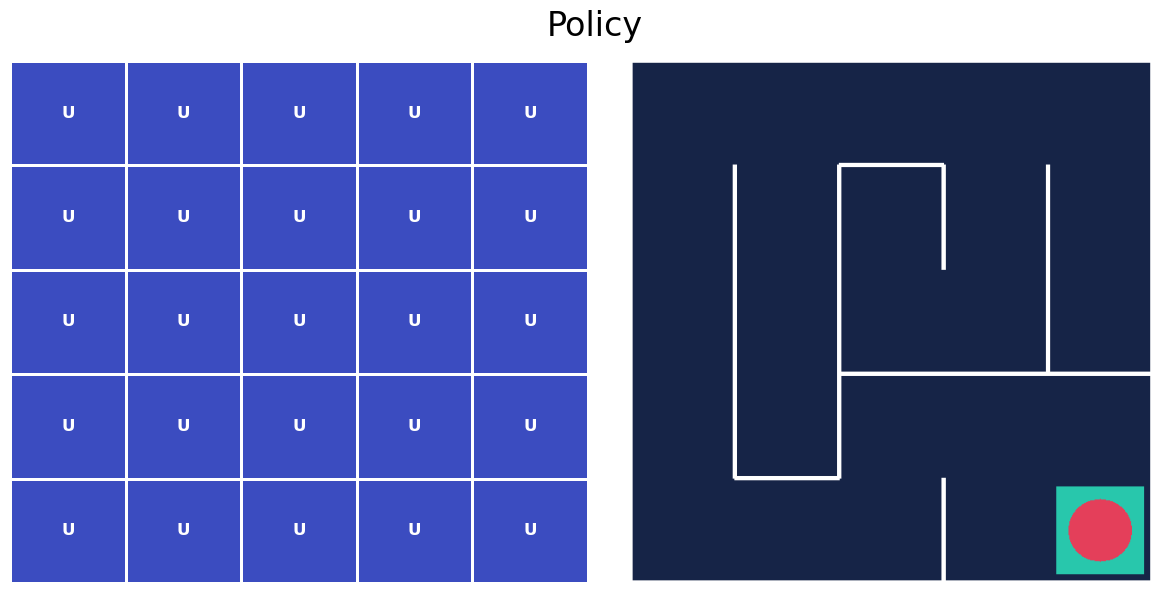

## Define value table $V(s)$

#### Create the $V(s)$ table

#### Plot $V(s)$

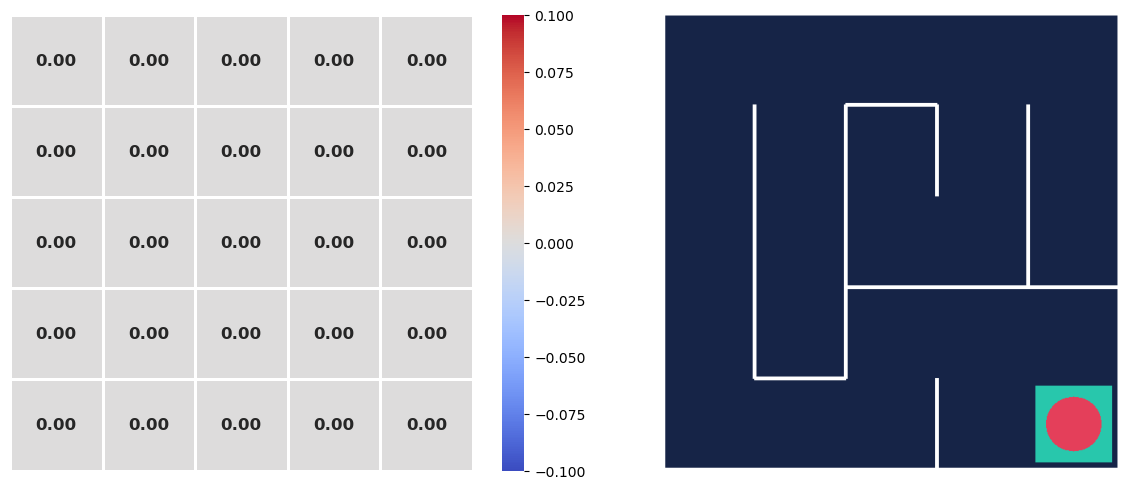

## Implement the Value Iteration algorithm

</br>


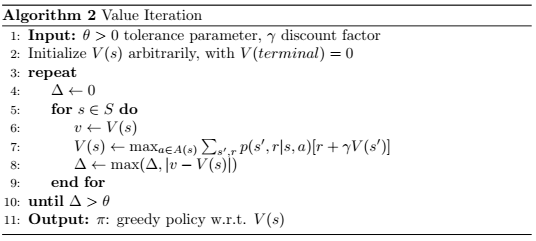

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

-10.466174574128356

NameError: name 'action_probs' is not defined

## Show results

#### Show resulting value table $V(s)$

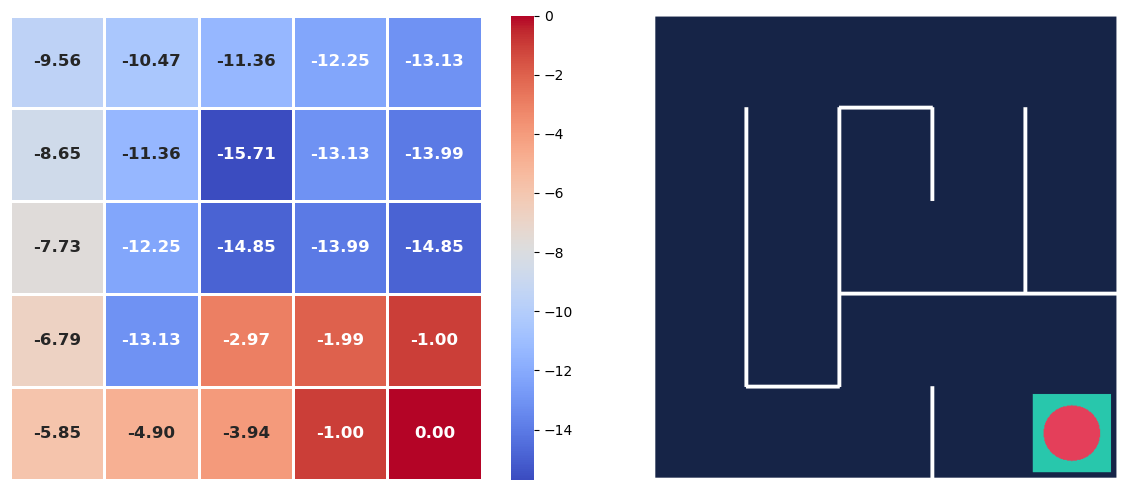

#### Show resulting policy $\pi(\cdot|s)$

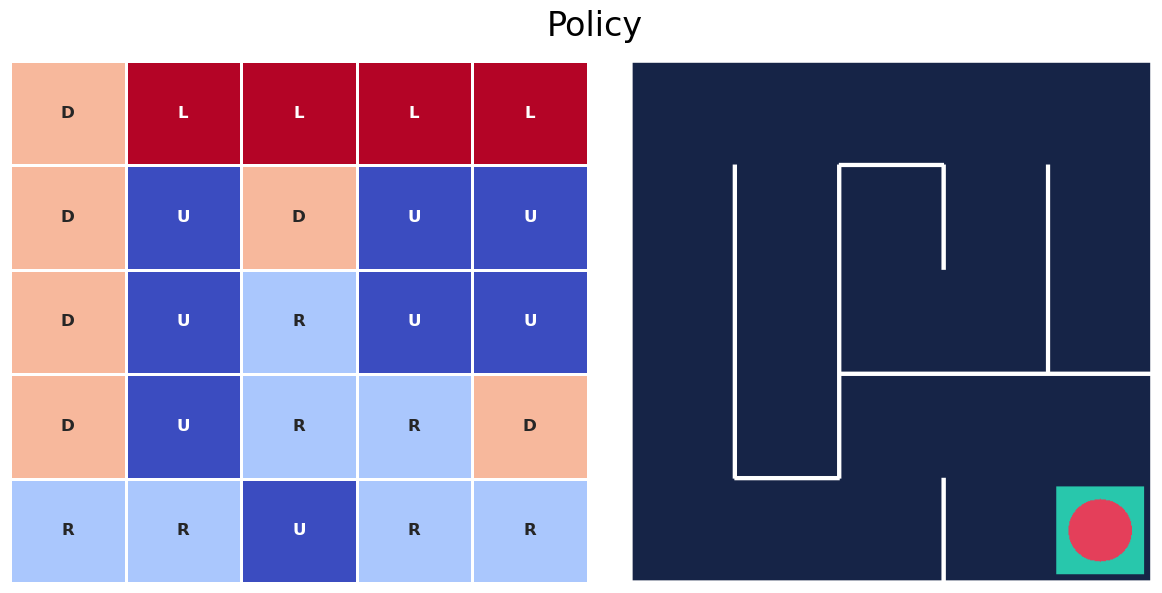

#### Test the resulting agent

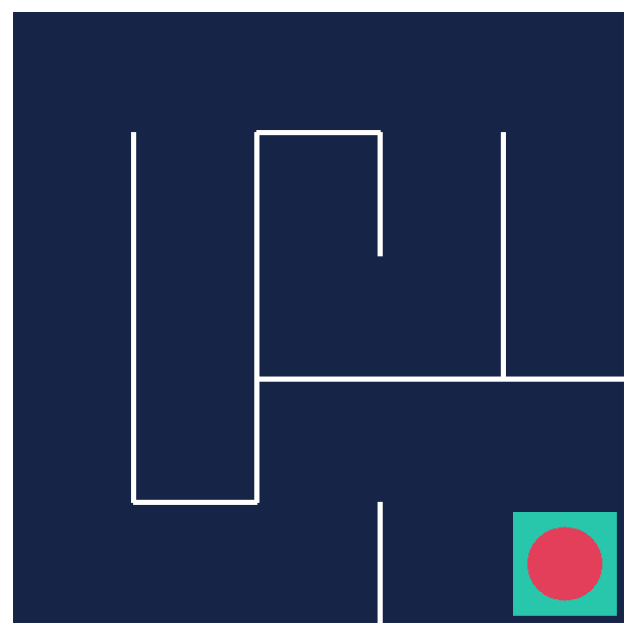

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)